In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
diabetes= pd.read_csv("/content/drive/MyDrive/Diabetes1csv.csv")
X = diabetes.drop(columns=["Outcome"]).values
Y = diabetes["Outcome"].values
orgfeature_names = diabetes.columns[:-1]
orgfeature_names

Mounted at /content/drive


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestClassifier(n_estimators=5000, random_state=42)

# Train the model on the training set
rf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf.predict(X_test)

# Evaluate the model's performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Calculate accuracy of the model
accuracy = rf.score(X_test, y_test)
print("Accuracy:", accuracy)

def predict_proba(X):
    return rf.predict_proba(X)

Mean Squared Error: 0.17721518987341772
R^2 Score: 0.06271186440677967
Accuracy: 0.8227848101265823


LIME Explanation for Random tree

In [ ]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=56906a841447ba19102be462658868406e4f66b8907fa2a0b1f35bc62c175635
  Stored in directory: /root/.cache/pip/wheels/ed/d7/c9/5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


In [ ]:
import lime

In [ ]:
import lime.lime_tabular

True class: Diabetes
Glucose > 144.00 0.3082324373008077
27.00 < Age <= 36.50 0.058872863210754925
33.30 < BMI <= 37.05 0.0460719775741233
BloodPressure > 80.00 0.04050132999296842
0.27 < DiabetesPedigreeFunction <= 0.44 -0.023830894608665717
78.00 < Insulin <= 130.00 -0.023402835673769228
Pregnancies <= 1.00 -0.008184632431309671
22.00 < SkinThickness <= 30.00 -0.000746565630048561


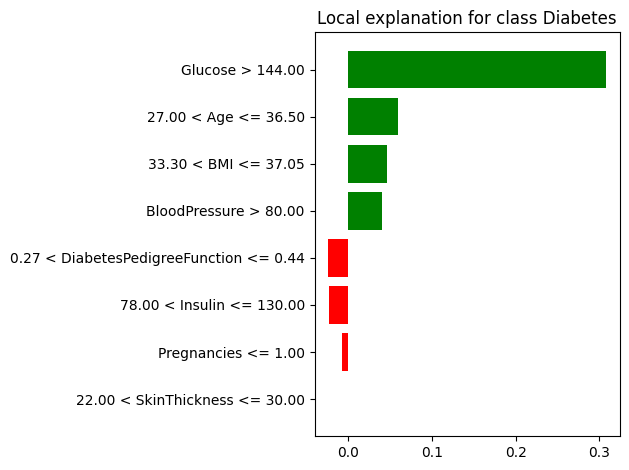

In [ ]:
# Initialize a LimeTabularExplainer with feature names
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=orgfeature_names, class_names=['No diabetes', 'Diabetes'], discretize_continuous=True)

# Select an instance from the test set to explain
idx = 44
X_instance = X_test[idx]
y_true = y_test[idx]

# Explain the prediction of the random forest classifier for the instance using LIME
exp = explainer.explain_instance(X_instance, predict_proba, num_features=8)

# Print the true class and the top features contributing to the prediction
print('True class:', 'Diabetes' if y_true else 'No diabetes')
for feature, weight in exp.as_list():
    print(feature, weight)

# Plot the explanation
fig = exp.as_pyplot_figure()
plt.tight_layout()
plt.show()

SHAP VALUE CODE FOR RANDOM TREE

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 8.3 MB/s eta 0:00:00


In [ ]:
import shap

[array([[ 1.35757953e-02, -2.92078167e-02,  4.33667307e-03,
         7.30499482e-02, -4.27470234e-02,  2.36106891e-02,
        -8.01323562e-02,  6.34677413e-02],
       [-9.83339299e-04, -7.57729703e-02, -2.08886961e-02,
        -2.80746935e-02, -7.86941168e-02, -5.75074139e-02,
        -4.77999744e-02, -5.31251449e-02],
       [-3.45422935e-02,  1.34078026e-01,  2.88389875e-03,
        -1.81935811e-02,  7.42141163e-02, -3.10328546e-02,
        -9.77217352e-02, -3.71319257e-02],
       [ 4.85191703e-03,  1.15829949e-01, -2.71970743e-02,
         4.05176845e-02,  2.67516003e-02,  2.86850305e-02,
        -4.40374016e-02,  6.15194549e-03],
       [ 1.28322501e-02,  1.20325159e-01,  1.50130636e-02,
        -7.60992023e-02,  1.00376629e-01, -2.37378672e-02,
        -7.98623864e-02,  5.10600453e-03],
       [ 3.13655266e-02,  1.27284426e-01,  1.05126992e-02,
         2.30581553e-03, -5.54716597e-02, -4.20959966e-02,
         2.01244229e-02,  9.81284167e-02],
       [ 1.29198861e-02,  1.15472

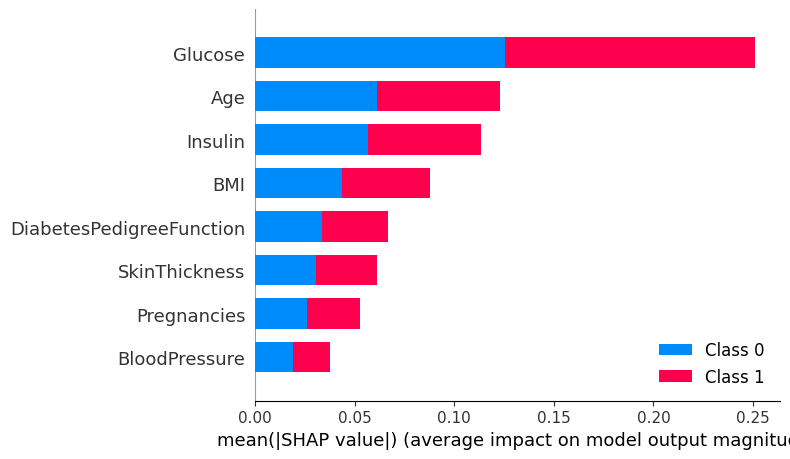

In [ ]:
# Create an explainer object
explainer = shap.TreeExplainer(rf)

# Calculate SHAP values for test set
shap_values = explainer.shap_values(X_test)

print(shap_values)
# Create a SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=orgfeature_names, plot_type="bar")
